## 데이터 크롤링

In [4]:
pip install selenium

  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached h11-0.14.0-py3-none-any.whl.metadata (8.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 11.3 MB/s eta 0:00:0000:0100:01
Using cached sniffio-1.3.1-py3-none-any.whl (10 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached h11-0.14.0-py3-none-any.whl (58 kB)
Note: you may need to restart the kernel to use updated packages.


### 한국은행 기준금리 추이

In [9]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
import json
from selenium.common.exceptions import NoSuchElementException
import pandas as pd


driver = webdriver.Chrome()
driver.maximize_window()

driver.get("https://www.bok.or.kr/portal/singl/baseRate/list.do?dataSeCd=01&menuNo=200643")
rows = driver.find_elements(By.XPATH, '//*[@id="main-container"]/div[2]/div[2]/table/tbody/tr')

results = []
for row in rows:
    try:
        tds = row.find_elements(By.TAG_NAME, 'td')
        if len(tds) >= 3:
            year = tds[0].text.strip()
            date = tds[1].text.strip()
            rate = tds[2].text.strip()
            results.append((f"{year} {date}", float(rate)))
    except Exception as e:
        print("Error parsing row:", e)

driver.quit()

# DataFrame으로 정리
df = pd.DataFrame(results, columns=['date', 'base_rate'])
df['date'] = pd.to_datetime(df['date'], format='%Y %m월 %d일')

# 결과 확인
print(df.head())

        date  base_rate
0 2025-02-25       2.75
1 2024-11-28       3.00
2 2024-10-11       3.25
3 2023-01-13       3.50
4 2022-11-24       3.25


In [10]:
df

,date,base_rate
0,2025-02-25,2.75
1,2024-11-28,3.00
2,2024-10-11,3.25
3,2023-01-13,3.50
4,2022-11-24,3.25
5,2022-10-12,3.00
6,2022-08-25,2.50
7,2022-07-13,2.25
8,2022-05-26,1.75
9,2022-04-14,1.50


In [15]:
# 날짜가 datetime 형식이라고 가정 (이미 pd.to_datetime 처리된 상태)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# 컬럼명 한글로 정리
df.rename(columns={'date': '변경일자', 'base_rate': '기준금리'}, inplace=True)

# 연도 기준 정렬
df = df.sort_values(by='year')


In [16]:
df.head(2)

,변경일자,기준금리,year,month,day
57,1999-05-06,4.75,1999,5,6
56,2000-02-10,5.00,2000,2,10


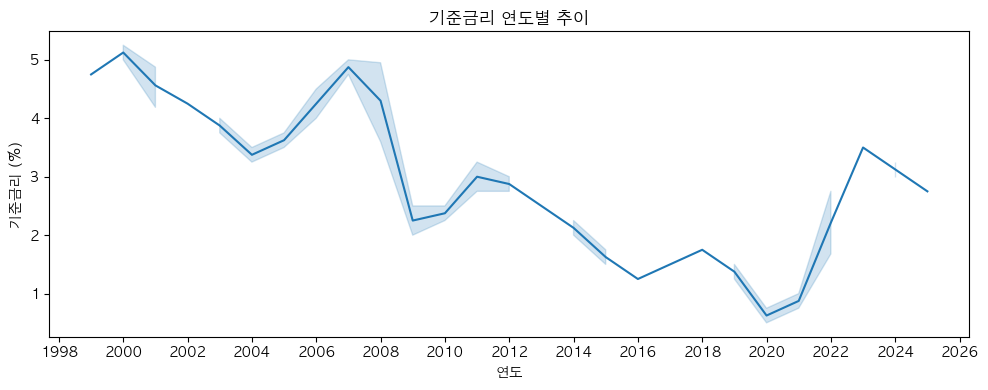

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.rc('font', family="AppleGothic")
plt.rcParams['axes.unicode_minus'] = False

# 기준금리 변화 시각화
plt.figure(figsize=(10, 4))
sns.lineplot(x="year", y="기준금리", data=df)

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(2))

plt.title("기준금리 연도별 추이")
plt.xlabel("연도")
plt.ylabel("기준금리 (%)")
plt.tight_layout()
plt.show()


### 네이버 기사 타이틀

In [21]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
from selenium.common.exceptions import NoSuchElementException
import pandas as pd

def scroll_down(driver):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(3)

# 드라이버 실행
driver = webdriver.Chrome()
driver.maximize_window()
driver.get("https://search.naver.com/search.naver?sm=tab_hty.top&where=news&ssc=tab.news.all&query=%EA%B2%BD%EC%A0%9C&oquery=ai&tqi=jsB21lpzL8VssKbcy2VssssstGC-199085&ackey=8d0lwq4n")

results = []
scroll_count = 0

while len(results) < 100:
    try : 
        ul = driver.find_element(By.CLASS_NAME, 'list_news')
        items = ul.find_elements(By.CSS_SELECTOR, 'a > span.sds-comps-text-type-headline1')

        for item in items:
            title = item.text
            if title and {'title': title} not in results:  # 중복 방지
                results.append({'title': title})
                if len(results) >= 100:
                    break

        scroll_down(driver)
        scroll_count += 1
        print(f"스크롤 {scroll_count}회 진행됨, 현재 수집 개수: {len(results)}")
    except NoSuchElementException:
        print("NoSuchElementException")

driver.quit()

# 데이터프레임 생성
df = pd.DataFrame(results, columns=['title'])
display(df)


스크롤 1회 진행됨, 현재 수집 개수: 10
스크롤 2회 진행됨, 현재 수집 개수: 20
스크롤 3회 진행됨, 현재 수집 개수: 30
스크롤 4회 진행됨, 현재 수집 개수: 40
스크롤 5회 진행됨, 현재 수집 개수: 50
스크롤 6회 진행됨, 현재 수집 개수: 60
스크롤 7회 진행됨, 현재 수집 개수: 70
스크롤 8회 진행됨, 현재 수집 개수: 80
스크롤 9회 진행됨, 현재 수집 개수: 90
스크롤 10회 진행됨, 현재 수집 개수: 100


,title
0,"대기업 만난 박완수 지사 ""기업과 함께 지역경제 이끌겠다"""
1,21대 대선 공식 후보자 토론회 3회 실시…5월18일 경제분야부터
2,"올해 1분기 신속집행 101조6천억원 달성…""지역경제 회복"""
3,"韓대행, 美 학계 만나 ""경제협력 논의, 측면 지원해 달라"""
4,"""경제는 기대했는데""…'트럼프 경제' 지지율 또 ""1기 포함 최저"""
...,...
95,막 오른 韓美협상…경제의제 초점 속 美 '안보카드' 주목
96,"포항시, 에스퓨얼셀과 200억 MOU 체결…수소경제 선도도시 본격 시동"
97,"충남경제진흥원 노인일자리통합지원센터, 카페별무리 2호점 개소"
98,"광주시-광주경제자유구역청, 국내 최대 '월드IT쇼'운영"


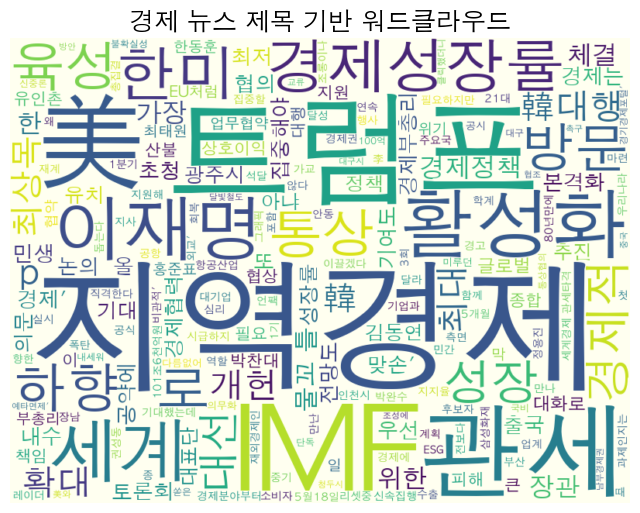

In [27]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# 제목 전체를 하나의 문자열로 결합
text = ' '.join(df['title'].tolist())

# 불용어 설정 (경제 관련 자주 나오는 불필요한 단어 추가)
stopwords = set(STOPWORDS)
stopwords.update([
    '기자', '뉴스', '보도', '경제', '한국', '정부', '올해', '대해', '대한',
    '시장', '중', '위해', '통해', '및', '더보기', '있다', '있어', '한다', '했다',
    '것', '등', '수', '것으로', '전망', '예정', '가능성', '상승', '하락', '달해'
])

# 워드클라우드 생성
wc = WordCloud(
    font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf',
    background_color='ivory',
    stopwords=stopwords,
    width=800,
    height=600
)

# 워드클라우드 생성
cloud = wc.generate(text)

# 시각화
plt.figure(figsize=(8, 8))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.title("경제 뉴스 제목 기반 워드클라우드", fontsize=18)
plt.show()
